
=== Produk Terlaris ===
  product_id         product_name  total_revenue
0    PROD001        Laptop Pro 15    390000000.0
1    PROD002         Smartphone X    238000000.0
2    PROD008          Sepatu Lari     18750000.0
3    PROD004  Mechanical Keyboard     14400000.0
4    PROD041       Tablet 10 inch     13500000.0

=== Pelanggan Paling Berharga ===
  customer_id customer_location  total_spent
0     CUST005           Jakarta  111600000.0
1     CUST033           Jakarta   90600000.0
2     CUST021           Jakarta   62500000.0
3     CUST001           Jakarta   56590000.0
4     CUST029           Jakarta   52200000.0
5     CUST041          Surabaya   51800000.0
6     CUST018           Jakarta   50200000.0
7     CUST037           Jakarta   31500000.0
8     CUST025           Jakarta   31300000.0
9     CUST071          Denpasar   30000000.0

=== Tren Penjualan Bulanan ===
    year  month  monthly_revenue
0   2023      1       24500000.0
1   2023      2       33380000.0
2   2023      3     

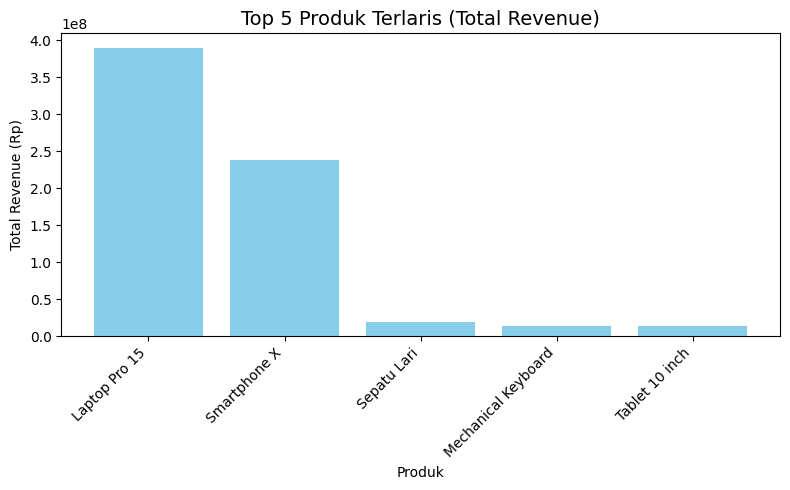

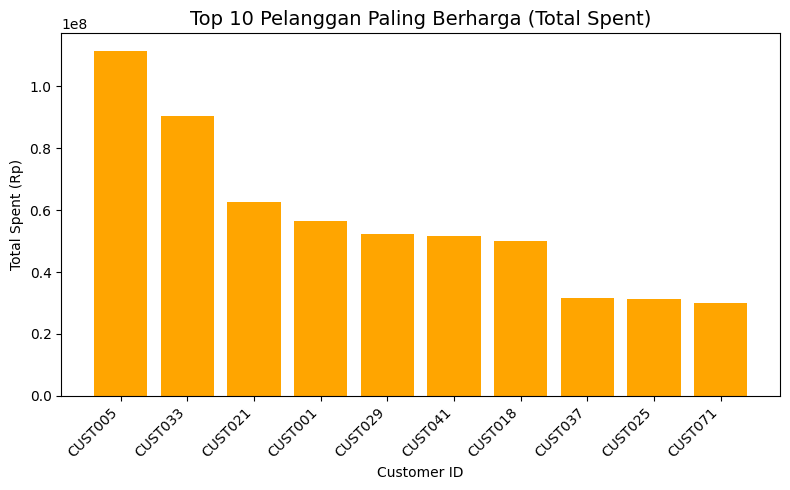

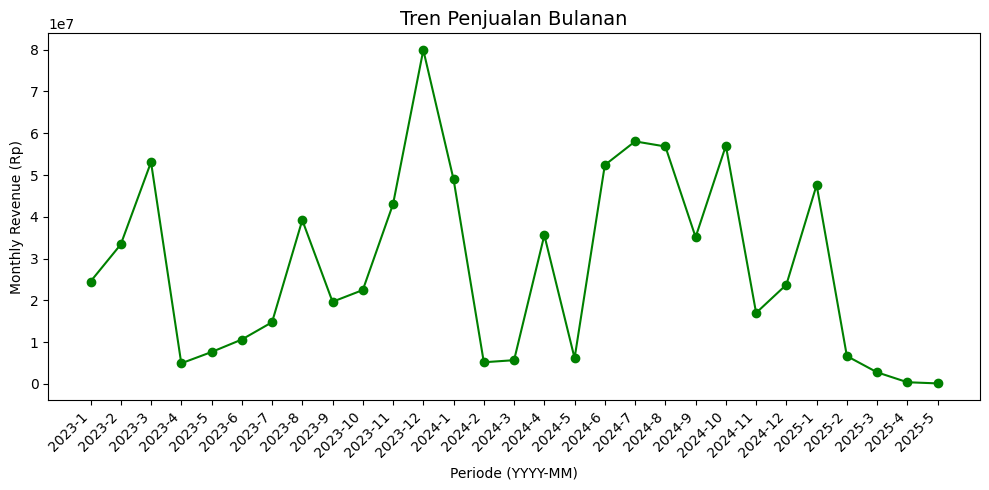

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from helper.generate import load_query
from service import postgres_svc

postgres_svc.connect()

query_products = load_query("resources/query.sql", "top_products")
query_customers = load_query("resources/query.sql", "top_customers")
query_monthly = load_query("resources/query.sql", "monthly_revenue")

df_products = postgres_svc.read_query(query_products)
df_customers = postgres_svc.read_query(query_customers)
df_monthly = postgres_svc.read_query(query_monthly)

print("\n=== Produk Terlaris ===")
print(df_products)

print("\n=== Pelanggan Paling Berharga ===")
print(df_customers)

print("\n=== Tren Penjualan Bulanan ===")
print(df_monthly)


# 1. Produk Terlaris
plt.figure(figsize=(8,5))
plt.bar(df_products["product_name"], df_products["total_revenue"], color="skyblue")
plt.title("Top 5 Produk Terlaris (Total Revenue)", fontsize=14)
plt.xlabel("Produk")
plt.ylabel("Total Revenue (Rp)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 2. Pelanggan Paling Berharga
plt.figure(figsize=(8,5))
plt.bar(df_customers["customer_id"].astype(str), df_customers["total_spent"], color="orange")
plt.title("Top 10 Pelanggan Paling Berharga (Total Spent)", fontsize=14)
plt.xlabel("Customer ID")
plt.ylabel("Total Spent (Rp)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3. Tren Penjualan Bulanan
df_monthly["period"] = df_monthly["year"].astype(str) + "-" + df_monthly["month"].astype(str)

plt.figure(figsize=(10,5))
plt.plot(df_monthly["period"], df_monthly["monthly_revenue"], marker="o", linestyle="-", color="green")
plt.title("Tren Penjualan Bulanan", fontsize=14)
plt.xlabel("Periode (YYYY-MM)")
plt.ylabel("Monthly Revenue (Rp)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
